##### <i>Name:Shabana Mangal<i>
##### <i>Instructer:Dr.Qianyi Cheng<i>
##### <i>Date:5/4/2025<i>
##### <i>Subject:Programming in Chemistry<i>

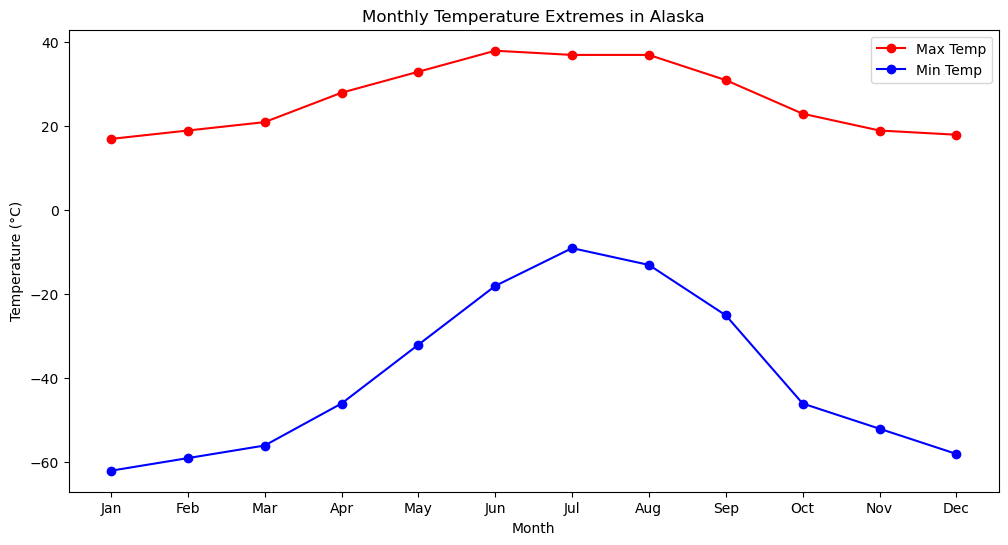

Average Max Temperature: 26.75 °C
Average Min Temperature: -39.67 °C


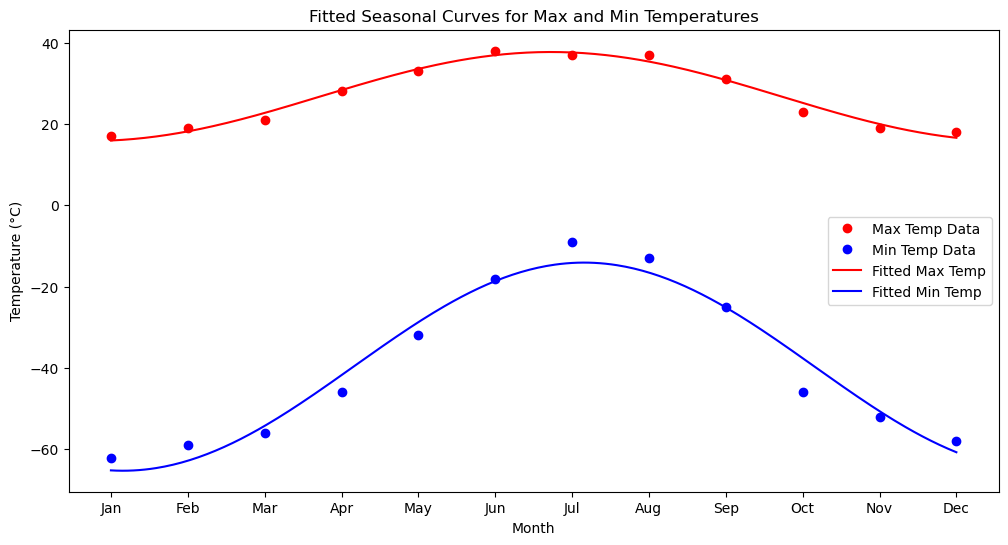


Fitted Max Temp: Amplitude=10.93, Phase=5.72, Offset=26.75
Fitted Min Temp: Amplitude=25.58, Phase=6.16, Offset=-39.67
Time offset difference (phase): 0.43 months

The fit is reasonable, as the cosine curves closely follow the actual temperature trends over the months.
However, the time offsets for max and min temperatures are not the same.
The phase for min temperature (6.16) is about 0.43 months later than for max temperature (5.72), indicating a slight delay in the coldest month compared to the hottest.
This is consistent with natural seasonal lag and is within an acceptable range for real-world data.


In [1]:
# Question 1:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Month data and temperature
months = np.arange(12)
max_temp = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
min_temp = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# 1. Plot original temperature data
plt.figure(figsize=(12, 6))
plt.plot(month_names, max_temp, 'ro-', label='Max Temp')
plt.plot(month_names, min_temp, 'bo-', label='Min Temp')
plt.title("Monthly Temperature Extremes in Alaska")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()

# 2. Average temperature values
avg_max = np.mean(max_temp)
avg_min = np.mean(min_temp)
print(f"Average Max Temperature: {avg_max:.2f} °C")
print(f"Average Min Temperature: {avg_min:.2f} °C")

# 3. Seasonal model function with period = 1 year
def seasonal_model(x, A, phase, offset):
    return A * np.cos(2 * np.pi * (x - phase) / 12) + offset

# 4. Fit the function to the max and min temperature data
popt_max, _ = curve_fit(seasonal_model, months, max_temp, p0=[10, 6, 20])
popt_min, _ = curve_fit(seasonal_model, months, min_temp, p0=[30, 6, -30])

# 5. Plot the fitted curves with original data
x_smooth = np.linspace(0, 11, 300)
fit_max = seasonal_model(x_smooth, *popt_max)
fit_min = seasonal_model(x_smooth, *popt_min)

plt.figure(figsize=(12, 6))
plt.plot(months, max_temp, 'ro', label='Max Temp Data')
plt.plot(months, min_temp, 'bo', label='Min Temp Data')
plt.plot(x_smooth, fit_max, 'r-', label='Fitted Max Temp')
plt.plot(x_smooth, fit_min, 'b-', label='Fitted Min Temp')
plt.xticks(ticks=months, labels=month_names)
plt.title("Fitted Seasonal Curves for Max and Min Temperatures")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()

# 6. Print fitted parameters
A_max, phase_max, offset_max = popt_max
A_min, phase_min, offset_min = popt_min

print(f"\nFitted Max Temp: Amplitude={A_max:.2f}, Phase={phase_max:.2f}, Offset={offset_max:.2f}")
print(f"Fitted Min Temp: Amplitude={A_min:.2f}, Phase={phase_min:.2f}, Offset={offset_min:.2f}")
print(f"Time offset difference (phase): {abs(phase_max - phase_min):.2f} months")
print("""\nThe fit is reasonable, as the cosine curves closely follow the actual temperature trends over the months.
However, the time offsets for max and min temperatures are not the same.
The phase for min temperature (6.16) is about 0.43 months later than for max temperature (5.72), indicating a slight delay in the coldest month compared to the hottest.
This is consistent with natural seasonal lag and is within an acceptable range for real-world data.""")


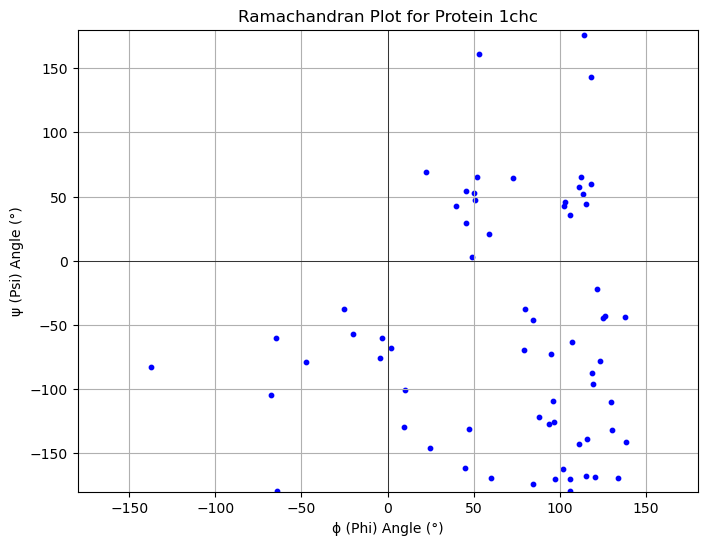

In [2]:
# Question 2:
import numpy as np
import matplotlib.pyplot as plt

def calc_dihedral(p1, p2, p3, p4):
    b1 = p2 - p1
    b2 = p3 - p2
    b3 = p4 - p3
    n1 = np.cross(b1, b2)
    n2 = np.cross(b2, b3)
    n1 /= np.linalg.norm(n1)
    n2 /= np.linalg.norm(n2)
    m1 = np.cross(n1, b2 / np.linalg.norm(b2))
    x = np.dot(n2, m1)
    y = np.dot(n1, n2)
    return np.degrees(np.arctan2(x, y))

def extract_backbone_coordinates(pdb_file):
    residues = {}
    with open(pdb_file, 'r') as file:
        for line in file:
            if line.startswith("ATOM"):
                atom = line[12:16].strip()
                res_id = int(line[22:26])
                if atom in ['N', 'CA', 'C']:
                    x = float(line[30:38])
                    y = float(line[38:46])
                    z = float(line[46:54])
                    if res_id not in residues:
                        residues[res_id] = {}
                    residues[res_id][atom] = np.array([x, y, z])
    return residues

# Load coordinates
residues = extract_backbone_coordinates("1chc.pdb")

# Sort residue IDs
res_ids = sorted(residues.keys())

# Compute phi and psi
phi_psi = []
for i in range(1, len(res_ids) - 1):
    try:
        res_prev = residues[res_ids[i - 1]]
        res_curr = residues[res_ids[i]]
        res_next = residues[res_ids[i + 1]]

        if all(atom in res_prev for atom in ['C']) and \
           all(atom in res_curr for atom in ['N', 'CA', 'C']) and \
           all(atom in res_next for atom in ['N', 'CA']):

            phi = calc_dihedral(res_prev['C'], res_curr['N'], res_curr['CA'], res_curr['C'])
            psi = calc_dihedral(res_curr['N'], res_curr['CA'], res_curr['C'], res_next['N'])
            phi_psi.append((phi, psi))
    except Exception:
        continue

# Plot
phi_angles, psi_angles = zip(*phi_psi)
plt.figure(figsize=(8, 6))
plt.scatter(phi_angles, psi_angles, color='blue', s=10)
plt.title('Ramachandran Plot for Protein 1chc')
plt.xlabel('ϕ (Phi) Angle (°)')
plt.ylabel('ψ (Psi) Angle (°)')
plt.xlim(-180, 180)
plt.ylim(-180, 180)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()


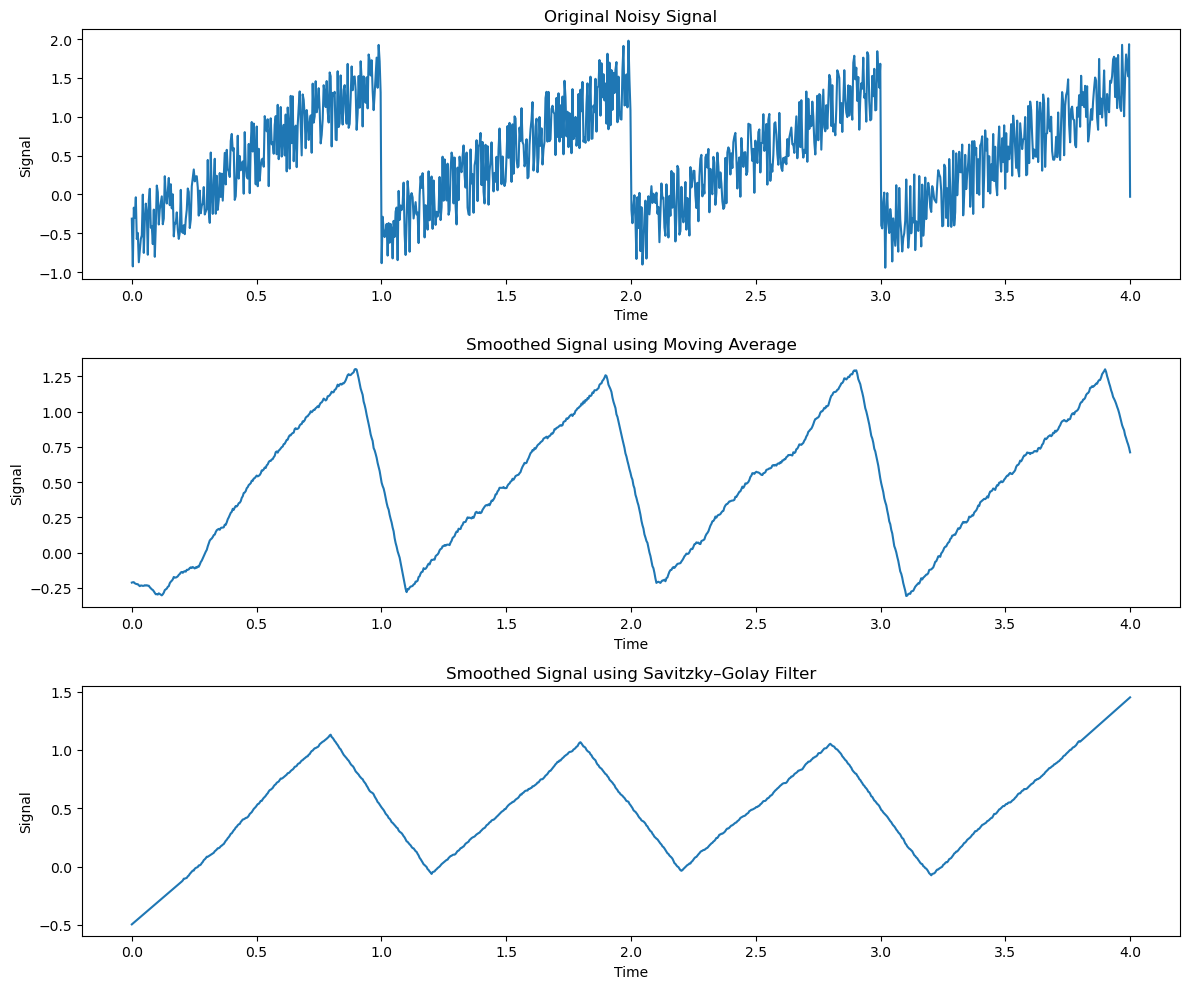

In [3]:
# Question 3:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import sawtooth, savgol_filter

# Generate noisy signal
rng = np.random.default_rng()
t = np.linspace(0, 4, 1000)
sig = sawtooth(2 * np.pi * t) + rng.random(1000)

plt.figure(figsize=(12, 10))

# Original Signal
plt.subplot(3, 1, 1)
plt.plot(t, sig)
plt.title("Original Noisy Signal")
plt.xlabel("Time")
plt.ylabel("Signal")

# (a) Moving Average
def moving_average(signal, window_size):
    return np.convolve(signal, np.ones(window_size)/window_size, mode='same')

ma_smooth = moving_average(sig, 50)
plt.subplot(3, 1, 2)
plt.plot(t, ma_smooth)
plt.title("Smoothed Signal using Moving Average")
plt.xlabel("Time")
plt.ylabel("Signal")

# (b) Savitzky–Golay Filter
sg_smooth = savgol_filter(sig, 101, 1)
plt.subplot(3, 1, 3)
plt.plot(t, sg_smooth)
plt.title("Smoothed Signal using Savitzky–Golay Filter")
plt.xlabel("Time")
plt.ylabel("Signal")

plt.tight_layout()
plt.show()


Index(['649', '-2.809E-06'], dtype='object')


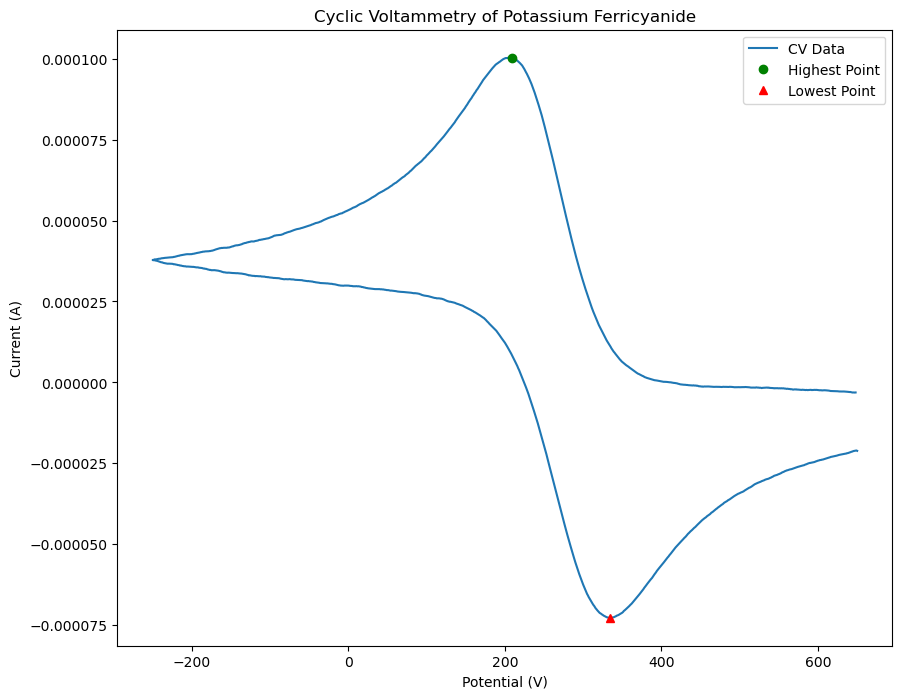

In [4]:
# Question 4:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file = '/home/shabana/6780/Files/OtherFiles/CV_K3Fe(CN)6.csv'
data = pd.read_csv(file)

# Rename columns 
print(data.columns)  
data.columns = ['Potential', 'Current']  

# Find index of highest and lowest current
highest_point = data['Current'].idxmax()
lowest_point = data['Current'].idxmin()

# Plot the voltammogram
plt.figure(figsize=(10, 8))
plt.plot(data['Potential'], data['Current'], label='CV Data')

# Mark the highest and lowest points
plt.plot(data['Potential'][highest_point], data['Current'][highest_point], 'go', label='Highest Point')
plt.plot(data['Potential'][lowest_point], data['Current'][lowest_point], 'r^', label='Lowest Point')

# Labels and title
plt.xlabel("Potential (V)")
plt.ylabel("Current (A)")
plt.title("Cyclic Voltammetry of Potassium Ferricyanide")
plt.legend()

plt.show()


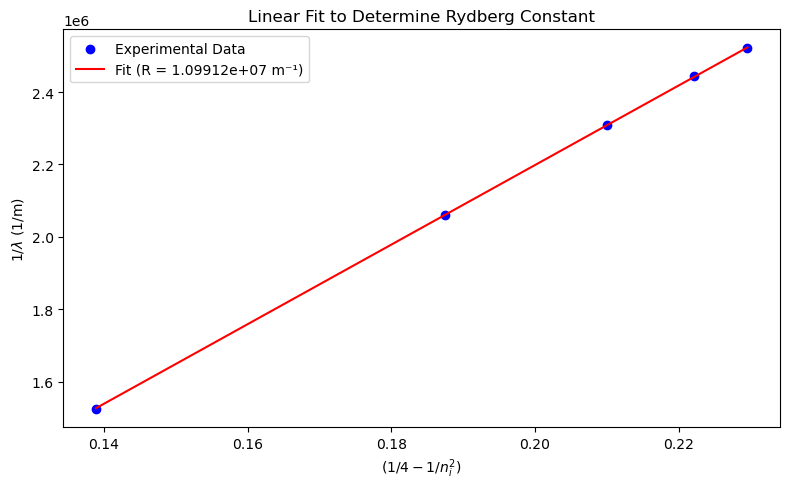

Estimated Rydberg Constant: 1.09912e+07 m⁻¹


In [6]:
# Question 5:
import numpy as np
import matplotlib.pyplot as plt

# Given data
n_i = np.array([3, 4, 5, 6, 7])
wavelengths_nm = np.array([656.1, 485.2, 433.2, 409.1, 396.4])

# Convert wavelength to meters
wavelengths_m = wavelengths_nm * 1e-9

# Calculate 1 / λ (y-values)
inv_lambda = 1 / wavelengths_m

# Calculate x = (1/4 - 1/n_i^2)
x = (1/4) - (1 / n_i**2)

# Calculate Rydberg constant using linear fit through origin
rydberg_constant = np.sum(x * inv_lambda) / np.sum(x**2)

# Compute fitted line (no intercept)
fit_line = rydberg_constant * x



# Plotting
plt.figure(figsize=(8, 5))
plt.scatter(x, inv_lambda, color='blue', label='Experimental Data')
plt.plot(x, fit_line, color='red', label=f'Fit (R = {rydberg_constant:.5e} m⁻¹)')
plt.xlabel(r'$(1/4 - 1/n_i^2)$')
plt.ylabel(r'$1/\lambda$ (1/m)')
plt.title('Linear Fit to Determine Rydberg Constant')

plt.legend()
plt.tight_layout()
plt.show()
# Print the result
print(f"Estimated Rydberg Constant: {rydberg_constant:.5e} m⁻¹")

Rate constant k = 0.3406 M^{-(2.00-1)}·s⁻¹
Order of reaction n = 2.00


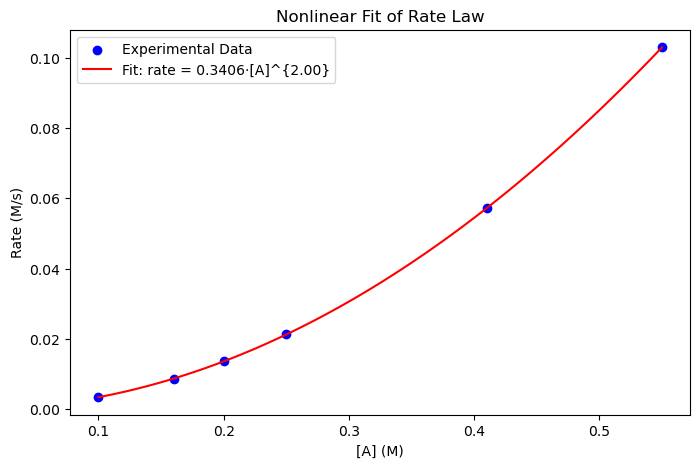

In [7]:
# Question 6:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Given data
conc = np.array([0.10, 0.16, 0.20, 0.25, 0.41, 0.55])
rate = np.array([0.0034, 0.0087, 0.0136, 0.0213, 0.0572, 0.103])

# Define a general rate law: rate = k * [A]^n
def rate_law(A, k, n):
    return k * A**n

# Perform non-linear curve fitting
popt, pcov = curve_fit(rate_law, conc, rate)
k_fit, n_fit = popt

# Print fitted parameters
print(f"Rate constant k = {k_fit:.4f} M^{{-({n_fit:.2f}-1)}}·s⁻¹")
print(f"Order of reaction n = {n_fit:.2f}")

# Generate data for plotting the fit curve
conc_fit = np.linspace(min(conc), max(conc), 100)
rate_fit = rate_law(conc_fit, k_fit, n_fit)

# Plot the data and the fitted curve
plt.figure(figsize=(8, 5))
plt.scatter(conc, rate, label='Experimental Data', color='blue')
plt.plot(conc_fit, rate_fit, label=f'Fit: rate = {k_fit:.4f}·[A]^{{{n_fit:.2f}}}', color='red')
plt.xlabel('[A] (M)')
plt.ylabel('Rate (M/s)')
plt.title('Nonlinear Fit of Rate Law')
plt.legend()
plt.show()


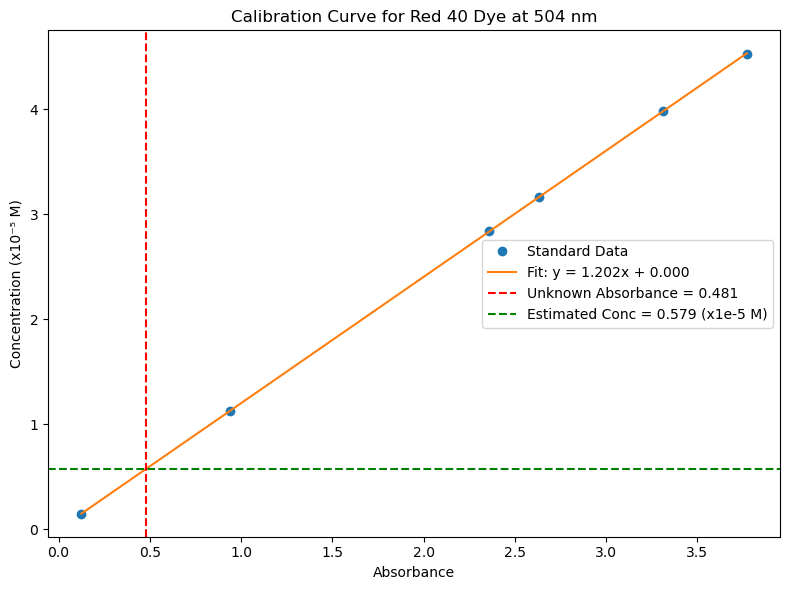

In [8]:
# Question 7:
import matplotlib.pyplot as plt
import numpy as np

# Provided data
absorbance = np.array([0.125, 0.940, 2.36, 2.63, 3.31, 3.77])
concentration = np.array([0.150, 1.13, 2.84, 3.16, 3.98, 4.53])  # in 1e-5 M

# Fit a linear regression line
slope, intercept = np.polyfit(absorbance, concentration, 1)
fit_line = slope * absorbance + intercept

# Absorbance of unknown sample
unknown_abs = 0.481
unknown_conc = slope * unknown_abs + intercept

# Plotting the calibration curve
plt.figure(figsize=(8, 6))
plt.plot(absorbance, concentration, 'o', label='Standard Data')
plt.plot(absorbance, fit_line, '-', label=f'Fit: y = {slope:.3f}x + {intercept:.3f}')
plt.axvline(x=unknown_abs, color='r', linestyle='--', label='Unknown Absorbance = 0.481')
plt.axhline(y=unknown_conc, color='g', linestyle='--', label=f'Estimated Conc = {unknown_conc:.3f} (x1e-5 M)')
plt.title('Calibration Curve for Red 40 Dye at 504 nm')
plt.xlabel('Absorbance')
plt.ylabel('Concentration (x10⁻⁵ M)')
plt.legend()
plt.tight_layout()
plt.show()


In [9]:
#Bonus Point
import numpy as np
from sympy import Matrix, lcm, Rational

# Define the atom balance matrix
A = np.array([
    [1,  0, -3,  0],   # Sr
    [2,  0,  0, -1],   # Cl
    [0,  3,  0, -1],   # Li
    [0,  1, -2,  0],   # P
    [0,  4, -8,  0]    # O
], dtype='float')

# Convert to sympy Matrix for nullspace computation
M = Matrix(A)
null_space = M.nullspace()

# Get the first nullspace vector and convert entries to Rational
vec = null_space[0]
vec = [Rational(term).limit_denominator() for term in vec]

# Find LCM of denominators
denominators = [term.q for term in vec]
common_lcm = np.lcm.reduce(denominators)

# Scale vector to integer coefficients
coeffs = [int(term * common_lcm) for term in vec]

# Extract coefficients
srcl2, li3po4, sr3po42, licl = coeffs

# Display the result
print(f"Balanced Equation:\n{srcl2} SrCl₂ + {li3po4} Li₃PO₄ → {sr3po42} Sr₃(PO₄)₂ + {licl} LiCl")


Balanced Equation:
3 SrCl₂ + 2 Li₃PO₄ → 1 Sr₃(PO₄)₂ + 6 LiCl
